In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import matplotlib.patches as mpatches

In [123]:
schedule = pd.read_csv('sol_lt_500.tsv',delimiter='\t')
schedule['a*'] = schedule['a*'].apply(ast.literal_eval)
schedule['x'] = schedule['a*'].apply(lambda x: sum(x))
schedule

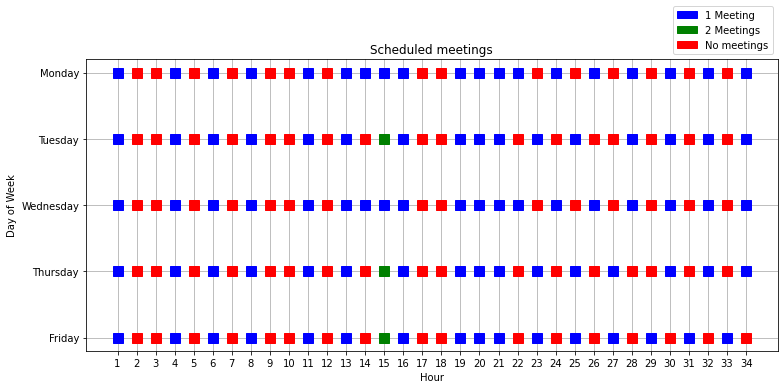

num meetings:  92


In [164]:
def plot_schedule_map(schedule):
    incr = 0

    plt.figure(figsize=(11, 5))
    plt.title(f"Scheduled meetings")
    
    days = range(1,6)
    times = range(1,35)
    # Create a plot for each course
    for d in days:
        for t in times:
            meetings = sum((schedule['D']==d)&(schedule['T']==t))
            
            if meetings == 1:
                plt.plot(t, d, 'bs', markersize=10)
                incr += 1
            elif meetings == 2:
                plt.plot(t, d, 'gs', markersize=10)
                incr += 2 
            elif meetings == 3:
                plt.plot(t, d, 'ys', markersize=10)
                incr += 3
            elif meetings == 4:
                plt.plot(t, d, 'cs', markersize=10)
                incr += 4
            else:
                plt.plot(t, d, 'rs', markersize=10)
    plt.yticks(days, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
    plt.xticks(times)
    plt.gca().invert_yaxis()
    plt.xlabel('Hour')
    plt.ylabel('Day of Week')
    plt.grid(True)
    plt.tight_layout()

    one = mpatches.Patch(color='blue', label='1 Meeting')
    two = mpatches.Patch(color='green', label='2 Meetings')
    no = mpatches.Patch(color='red', label='No meetings')

    plt.legend(handles=[one,two,no], loc='lower right', bbox_to_anchor=(1,1))

    plt.show()
    print('num meetings: ', incr)
plot_schedule_map(schedule=schedule)

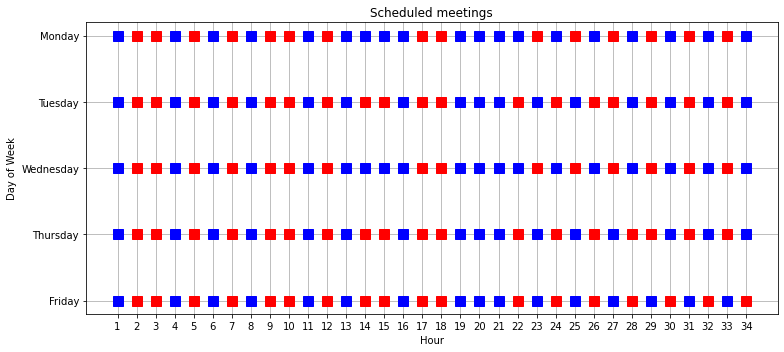

num meetings:  86


In [126]:
plot_schedule_map(schedule=schedule)